In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [9]:
df=pd.read_csv("supermarket_sales.csv")

In [38]:
#import warnings
warnings.simplefilter("ignore")

In [10]:
# Data Exploring
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
df.shape

(1000, 17)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [19]:
df.describe(exclude= object)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [23]:
#Data cleaning
missing_values = df.isnull().sum()
print(missing_values)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [29]:
df.duplicated().sum()

0

In [30]:
df.drop(columns='Invoice ID' , inplace=True)

In [45]:
#convert 'Date'column to datetime format
df['Date']= pd.to_datetime(df['Date'])

#convert 'Time'column to datetime format(time only)

df['Time']=pd.to_datetime(df['Time'])

print("Data Types after Processing:")
print(df.dtypes)

Data Types after Processing:
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


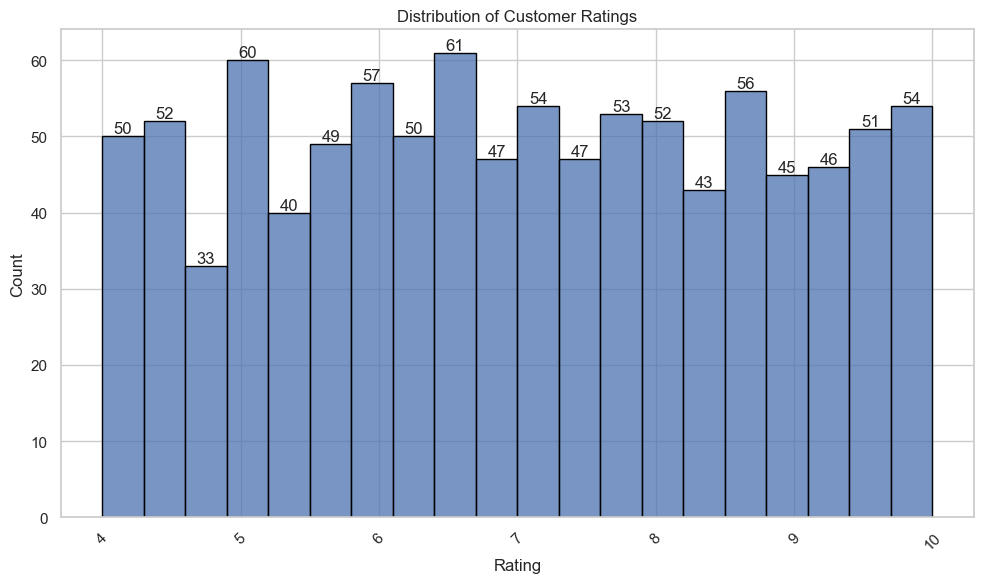

In [182]:
#Exploratory Data Analysis(EDA)


# Distribution of Customer Ratings
plt.figure(figsize=(10,6))
ax=sns.histplot(x='Rating', edgecolor="black", bins=20, data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title('Distribution of Customer Ratings')
plt.tight_layout()
plt.show()

In [ ]:
5-Sales Distribution by branch

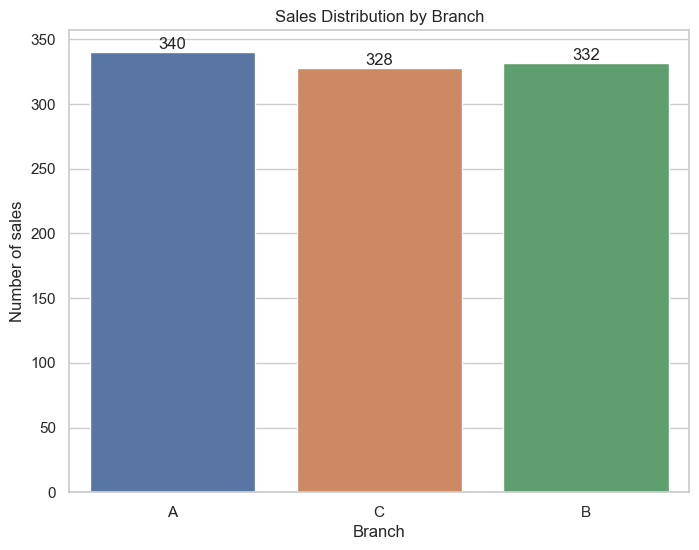

In [185]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='Branch', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Sales Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of sales')
plt.show()

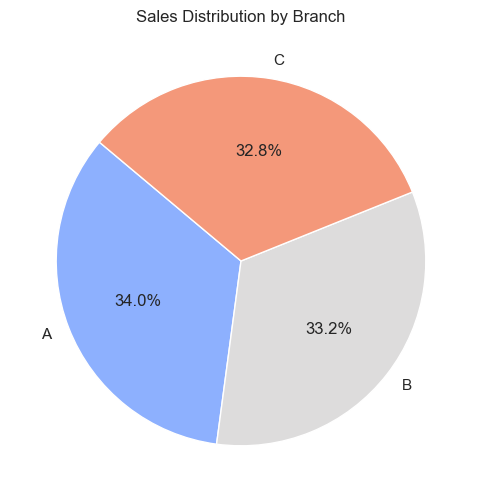

In [95]:
#Count the numbers of sales per branch

branch_sales= df['Branch'].value_counts()

#Plot a pie chart

plt.figure(figsize=(10, 6))

plt.pie(branch_sales, labels=branch_sales.index, autopct= '%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(branch_sales)))
        
plt.title('Sales Distribution by Branch')

plt.show()        
        

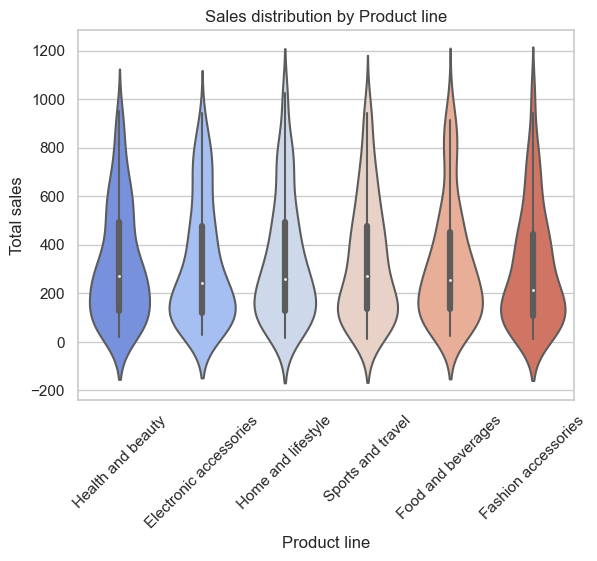

In [188]:
# Sales distrbution by product line

sns.violinplot(x='Product line' , y='Total', data=df, palette='coolwarm')
plt.title('Sales distribution by Product line')
plt.xlabel('Product line')
plt.ylabel('Total sales')
plt.xticks(rotation=45)

plt.show()

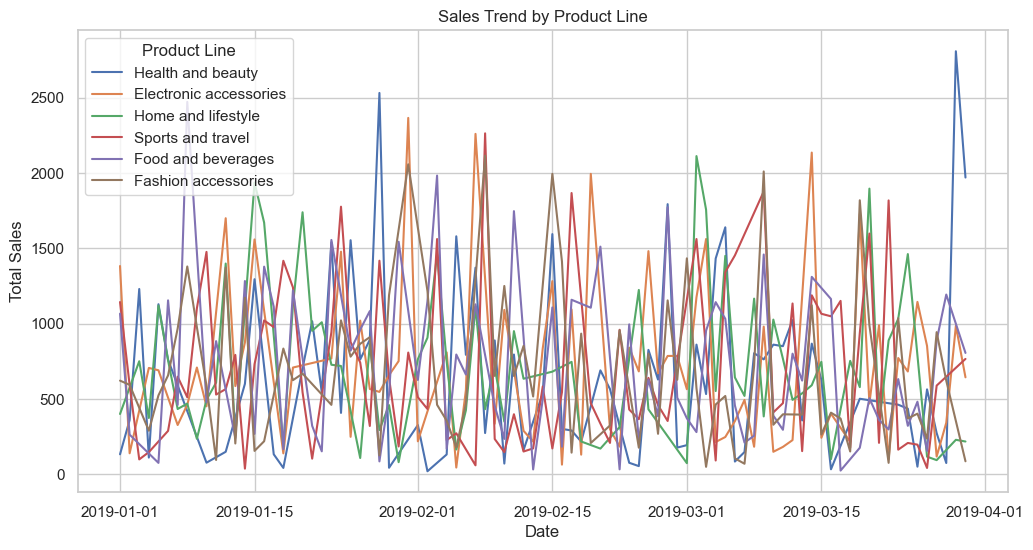

In [114]:
# sales trend by product line 
plt.figure(figsize=(12, 6))
for product_line in df['Product line'].unique():
    sales_trend = df[df['Product line'] == product_line].groupby('Date')['Total'].sum()
    plt.plot(sales_trend.index, sales_trend.values, label=product_line)

plt.title('Sales Trend by Product Line')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.show()

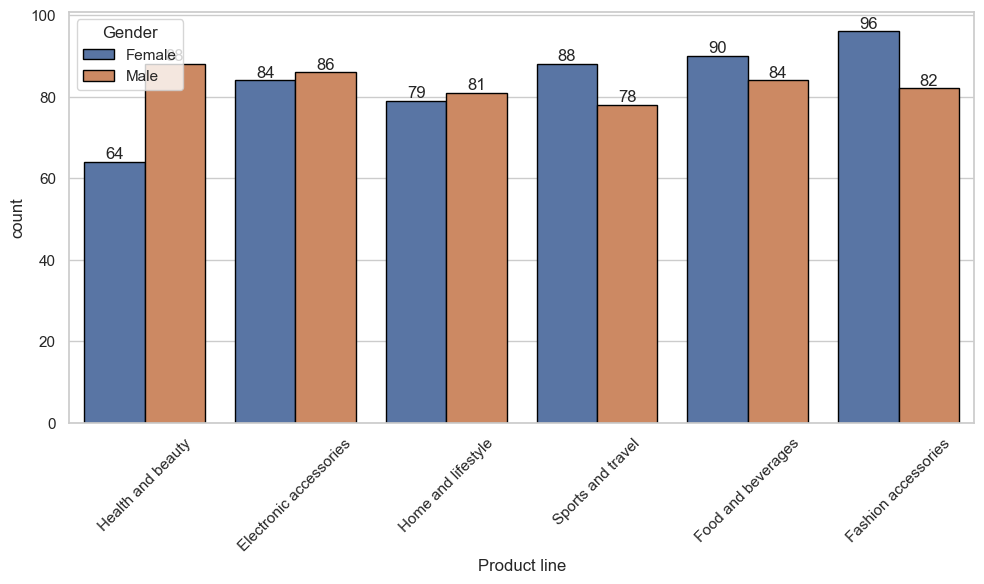

In [109]:
# Product line by gender

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df , x='Product line',hue='Gender', edgecolor="black")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


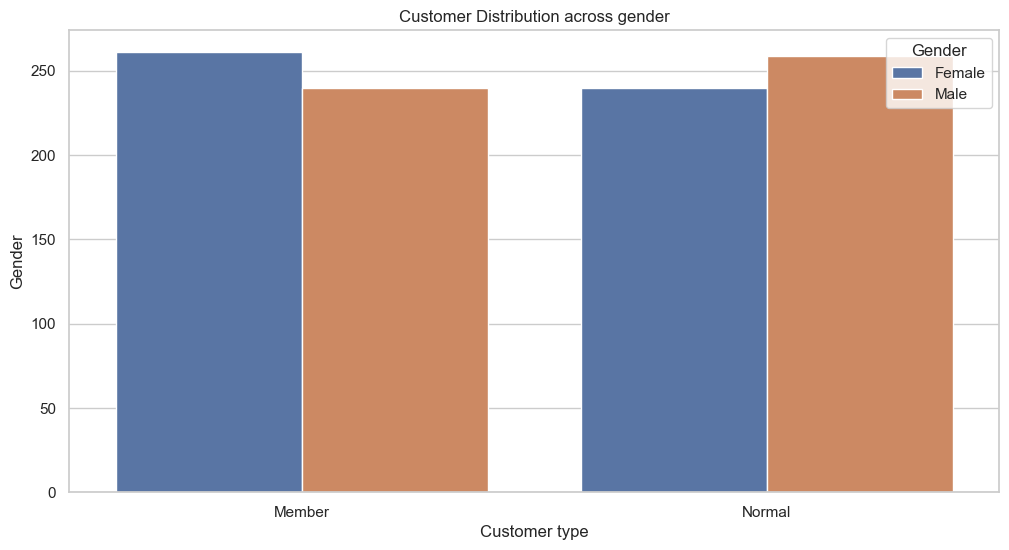

In [119]:
# Customer Distribution across gender

plt.figure(figsize=(12,6))

sns.countplot(x='Customer type', hue='Gender', data=df)
plt.xlabel("Customer type")
plt.ylabel("Gender")
plt.title("Customer Distribution across gender")

plt.show()


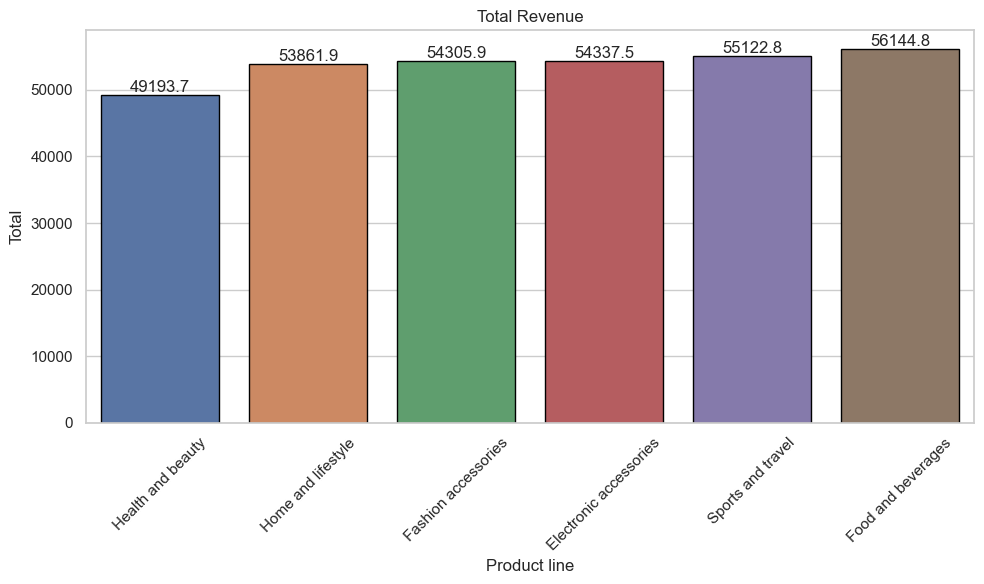

In [256]:

# Total revenue

plt.figure(figsize=(10,6))
ax=sns.barplot(x='Product line', y='Total', edgecolor="black", data=total_rev)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title('Total Revenue')
plt.tight_layout()
plt.show()


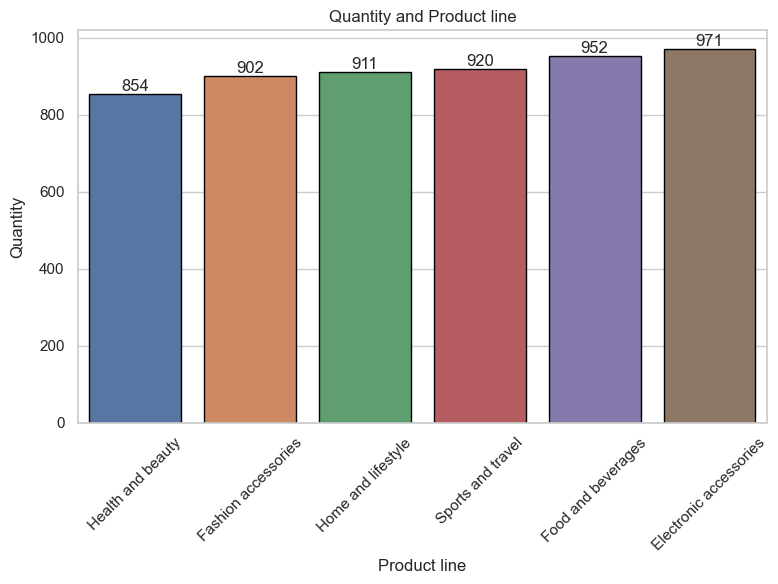

In [259]:
#Quantity and Product line(A revoir)

plt.figure(figsize=(8,6))
ax=sns.barplot(data=df_quantity ,x='Product line', estimator=sum, y='Quantity', edgecolor="black")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Quantity and Product line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [217]:
df.groupby(['Product line'])['Quantity'].size()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Quantity, dtype: int64

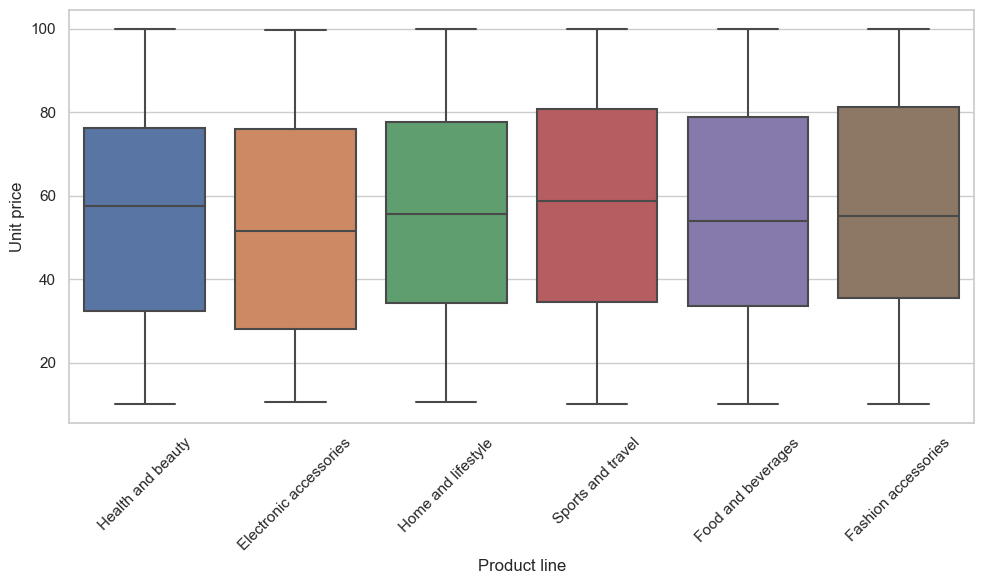

In [218]:
#Unit price and Product line

plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df ,x='Product line', y='Unit price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

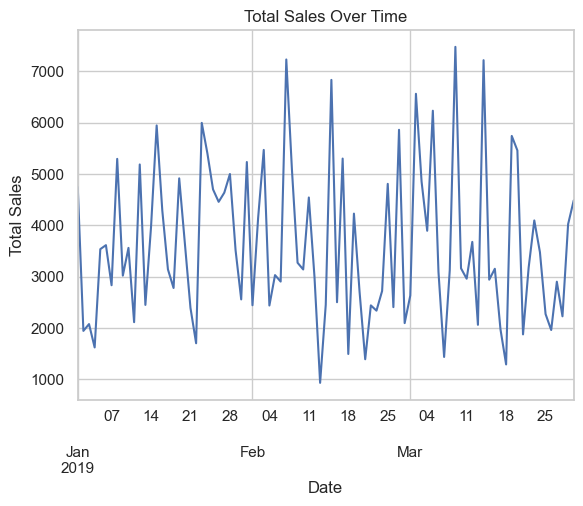

In [219]:
#Sales Trend Over Time

df.groupby('Date')['Total'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

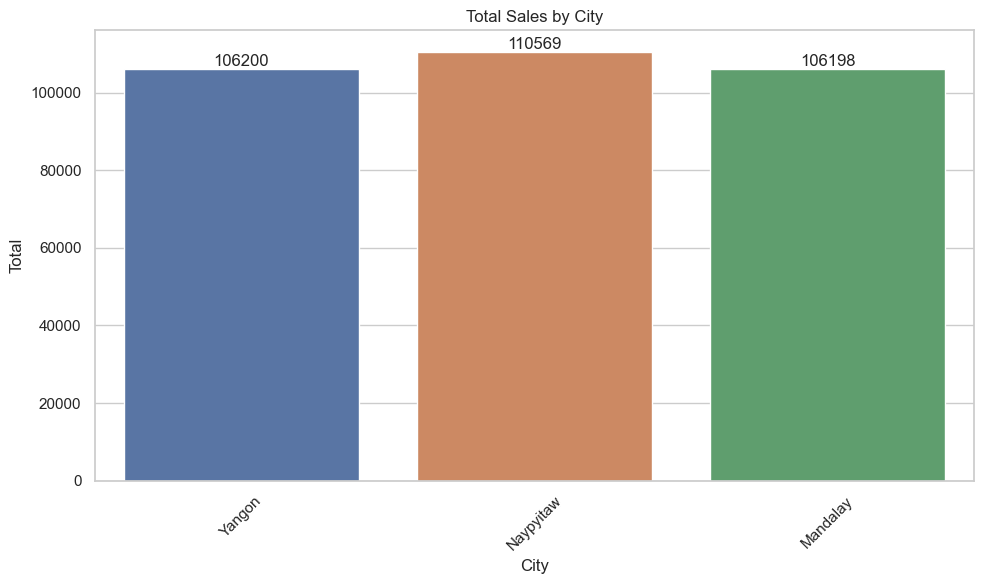

In [279]:
#Total sales by City

plt.figure(figsize=(10,6))
ax=sns.barplot(x='City', y='Total', data=df, estimator=sum, ci=None)

for container in ax.containers:
    ax.bar_label(container)
plt.title('Total Sales by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

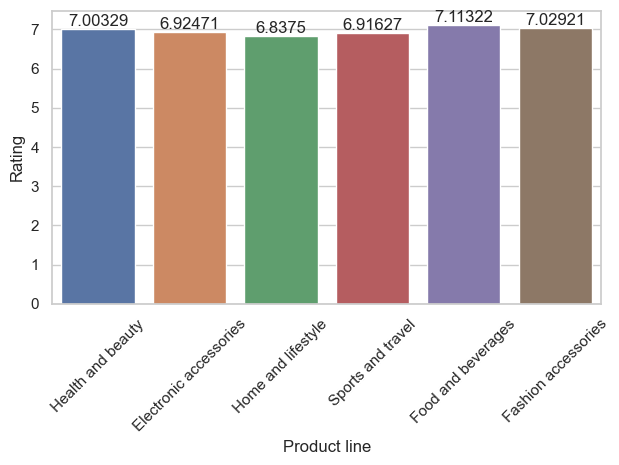

In [288]:
# Average rating By product Line
ax=sns.barplot(y='Rating', x='Product line', data=df, ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

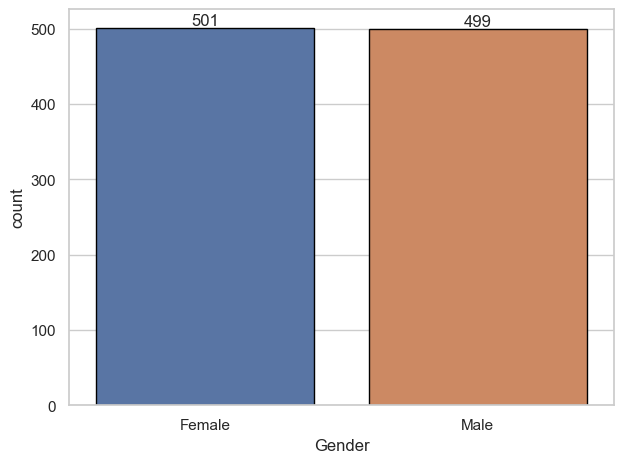

In [289]:
#Male and female count

ax = sns.countplot(data=df , x='Gender',edgecolor="black")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()